<a href="https://colab.research.google.com/github/elif-s286/Deep-Learning/blob/main/Dermotofit_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Risksiz gruplarla CNN modeli


In [ ]:
# importing cv2 
import cv2 
import numpy as np
import pandas as pd
import sys
import os
from PIL import Image
import glob
from google.colab.patches import cv2_imshow #cv2_imshow(crop_img) diye kullanılıyor.

In [ ]:
yol = "/content/drive/MyDrive/Colab Notebooks/ANN and CNN/dermofit"
list_yol = os.listdir(yol)
len(list_yol)

6

In [ ]:
img_list_c= glob.glob("/content/drive/MyDrive/Colab Notebooks/ANN and CNN/dermofit/mic_normal_2/*.png")
print(img_list_c)
img_list_r= glob.glob("/content/drive/MyDrive/Colab Notebooks/ANN and CNN/dermofit/tri_normal_r1/*.png")
img_list_t= glob.glob("/content/drive/MyDrive/Colab Notebooks/ANN and CNN/dermofit/tri_normal_t1/*.png")

['/content/drive/MyDrive/Colab Notebooks/ANN and CNN/dermofit/mic_normal_2/Ekran görüntüsü 2021-03-26 111227.png', '/content/drive/MyDrive/Colab Notebooks/ANN and CNN/dermofit/mic_normal_2/Ekran görüntüsü 2021-03-26 111325.png', '/content/drive/MyDrive/Colab Notebooks/ANN and CNN/dermofit/mic_normal_2/Ekran görüntüsü 2021-03-26 111410.png', '/content/drive/MyDrive/Colab Notebooks/ANN and CNN/dermofit/mic_normal_2/Ekran görüntüsü 2021-03-26 111626.png', '/content/drive/MyDrive/Colab Notebooks/ANN and CNN/dermofit/mic_normal_2/Ekran görüntüsü 2021-03-26 111658.png', '/content/drive/MyDrive/Colab Notebooks/ANN and CNN/dermofit/mic_normal_2/Ekran görüntüsü 2021-03-26 111723.png', '/content/drive/MyDrive/Colab Notebooks/ANN and CNN/dermofit/mic_normal_2/Ekran görüntüsü 2021-03-26 112034.png', '/content/drive/MyDrive/Colab Notebooks/ANN and CNN/dermofit/mic_normal_2/Ekran görüntüsü 2021-03-26 112139.png', '/content/drive/MyDrive/Colab Notebooks/ANN and CNN/der

In [ ]:
canis= []
rubrum = []


for i in img_list_c:
  img = cv2.imread(i)
  n_img_size = cv2.resize(img, (75,75), interpolation = cv2.INTER_LINEAR)
  canis.append([n_img_size,0])
for i in img_list_r:
  img = cv2.imread(i)
  n_img_size = cv2.resize(img, (75,75), interpolation = cv2.INTER_LINEAR)
  rubrum.append([n_img_size,1])


In [ ]:
X = []
y = []

image = np.concatenate((canis, rubrum))
random.shuffle(image)

for feature, label in image:
    X.append(feature)
    y.append(label)
    
X = np.array(X)
y = np.array(y)
y

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_predict, y_train, y_true  = train_test_split(X,y,shuffle=False, test_size=0.2, random_state=42)
print("X train",len(X_train))
print("X predict",len(X_predict))
print("y train",len(y_train))
print("y true",len(y_true))


X train 760
X predict 191
y train 760
y true 191


In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (75,75,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu' , input_shape = (75,75,3) ))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

In [ ]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_predict, y_true), epochs = 20, batch_size = 50)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


16/16 [==============================] - 5s 252ms/step - loss: 156.0430 - accuracy: 0.6211 - val_loss: 5.0109 - val_accuracy: 0.3351
Epoch 2/20
16/16 [==============================] - 4s 241ms/step - loss: 11.8851 - accuracy: 0.6342 - val_loss: 2.4853 - val_accuracy: 0.3874
Epoch 3/20
16/16 [==============================] - 4s 240ms/step - loss: 2.4932 - accuracy: 0.6197 - val_loss: 1.5878 - val_accuracy: 0.3455
Epoch 4/20
16/16 [==============================] - 4s 237ms/step - loss: 0.8156 - accuracy: 0.6829 - val_loss: 0.8624 - val_accuracy: 0.3979
Epoch 5/20
16/16 [==============================] - 4s 239ms/step - loss: 0.5701 - accuracy: 0.7645 - val_loss: 0.7419 - val_accuracy: 0.3927
Epoch 6/20
16/16 [==============================] - 4s 239ms/step - loss: 0.5455 - accuracy: 0.7500 - val_loss: 0.7862 - val_accuracy: 0.3717
Epoch 7/20
16/16 [==============================] - 4s 239ms/step - loss: 0.5178 - accuracy: 0.7697 - val_loss: 0.6916 - val_accuracy: 0.4660
Epoch 8/20
16/

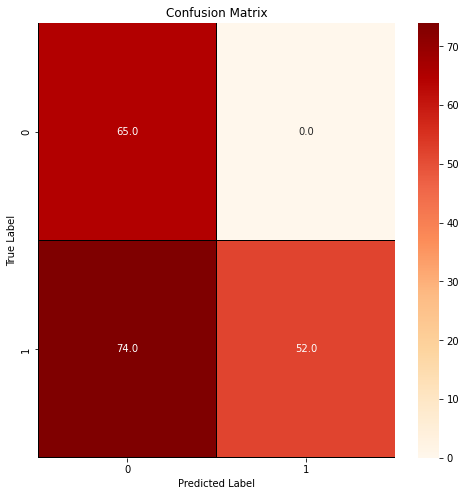

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = model.predict(X_predict)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 


confusion_mtx = confusion_matrix(y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="OrRd",linecolor="black", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.47      1.00      0.64        65
           1       1.00      0.41      0.58       126

    accuracy                           0.61       191
   macro avg       0.73      0.71      0.61       191
weighted avg       0.82      0.61      0.60       191



# Riskli Gruplarla CNN modeli

In [ ]:
yol2 = "/content/drive/MyDrive/Colab Notebooks/ANN and CNN/riskli"
list_yol2 = os.listdir(yol2)
len(list_yol2)

2

In [ ]:
img_c= glob.glob("/content/drive/MyDrive/Colab Notebooks/ANN and CNN/riskli/mic/*.png")
print(img_c)
img_r= glob.glob("/content/drive/MyDrive/Colab Notebooks/ANN and CNN/riskli/rubrum/*.png")


['/content/drive/MyDrive/Colab Notebooks/ANN and CNN/riskli/mic/Ekran görüntüsü 2021-03-26 111441 (2).png', '/content/drive/MyDrive/Colab Notebooks/ANN and CNN/riskli/mic/Ekran görüntüsü 2021-03-26 111441.png', '/content/drive/MyDrive/Colab Notebooks/ANN and CNN/riskli/mic/su damlası.png', '/content/drive/MyDrive/Colab Notebooks/ANN and CNN/riskli/mic/su damlası (2).png', '/content/drive/MyDrive/Colab Notebooks/ANN and CNN/riskli/mic/Ekran görüntüsü 2021-03-26 111759 (2).png', '/content/drive/MyDrive/Colab Notebooks/ANN and CNN/riskli/mic/Ekran görüntüsü 2021-03-26 111759.png', '/content/drive/MyDrive/Colab Notebooks/ANN and CNN/riskli/mic/güle benzeyen.png', '/content/drive/MyDrive/Colab Notebooks/ANN and CNN/riskli/mic/güle benzeyen (2).png', '/content/drive/MyDrive/Colab Notebooks/ANN and CNN/riskli/mic/Ekran görüntüsü 2021-03-26 112114.png', '/content/drive/MyDrive/Colab Notebooks/ANN and CNN/riskli/mic/Ekran görüntüsü 2021-03-26 112114 (2).png', '/content

In [ ]:
canis_risk= []
rubrum_risk= []

for i in img_c:
  img = cv2.imread(i)
  img_size = cv2.resize(img, (75,75), interpolation = cv2.INTER_LINEAR)
  canis_risk.append([img_size,0])
for i in img_r:
  img = cv2.imread(i)
  img_size = cv2.resize(img, (75,75), interpolation = cv2.INTER_LINEAR)
  rubrum_risk.append([img_size,1])


In [ ]:
X1= []
Y1= []

image = np.concatenate((canis_risk, rubrum_risk))
random.shuffle(image)

for feature, label in image:
    X1.append(feature)
    Y1.append(label)
    
X1 = np.array(X1)
Y1= np.array(Y1)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_predict1, y_train1, y_true1  = train_test_split(X1,Y1,shuffle=False, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (75,75,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu' , input_shape = (75,75,3)))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

In [ ]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train1)

In [ ]:
history = model.fit(X_train1, y_train1, validation_data = (X_predict1, y_true1), epochs = 20, batch_size = 50)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


30/30 [==============================] - 10s 321ms/step - loss: 32.6071 - accuracy: 0.8939 - val_loss: 2.2114 - val_accuracy: 0.6515
Epoch 2/20
30/30 [==============================] - 7s 247ms/step - loss: 0.4661 - accuracy: 0.9006 - val_loss: 0.7703 - val_accuracy: 0.6595
Epoch 3/20
30/30 [==============================] - 7s 248ms/step - loss: 0.2605 - accuracy: 0.9268 - val_loss: 0.5235 - val_accuracy: 0.6622
Epoch 4/20
30/30 [==============================] - 7s 246ms/step - loss: 0.2150 - accuracy: 0.9295 - val_loss: 0.6022 - val_accuracy: 0.6515
Epoch 5/20
30/30 [==============================] - 7s 245ms/step - loss: 0.2044 - accuracy: 0.9355 - val_loss: 0.4778 - val_accuracy: 0.6622
Epoch 6/20
30/30 [==============================] - 7s 247ms/step - loss: 0.1662 - accuracy: 0.9422 - val_loss: 0.4492 - val_accuracy: 0.7158
Epoch 7/20
30/30 [==============================] - 7s 245ms/step - loss: 0.1484 - accuracy: 0.9362 - val_loss: 0.5052 - val_accuracy: 0.6622
Epoch 8/20
30/3

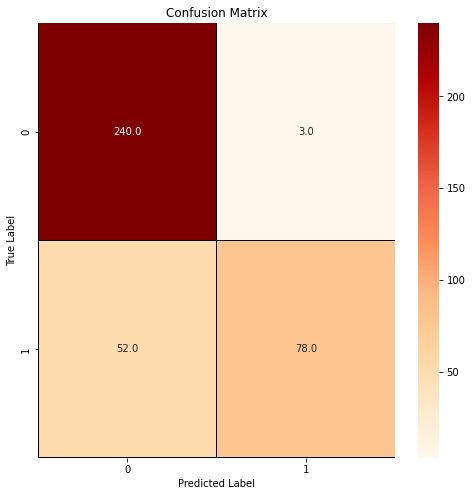

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred1 = model.predict(X_predict1)
Y_pred_classes1 = np.argmax(Y_pred1,axis = 1) 


confusion_mtx = confusion_matrix(y_true1, Y_pred_classes1) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="OrRd",linecolor="black", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true1, Y_pred_classes1))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       243
           1       0.96      0.60      0.74       130

    accuracy                           0.85       373
   macro avg       0.89      0.79      0.82       373
weighted avg       0.87      0.85      0.84       373



# TransferLearning_Xception



In [ ]:
import pandas as pd
import math, re, os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import activations
from tensorflow.keras import layers,callbacks
from tensorflow.keras.layers.experimental import preprocessing
import cv2
import copy # copy the matrix
from matplotlib import pyplot, transforms
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [ ]:
base_model = keras.applications.Xception(include_top=False,input_shape = (75,75,3))

83697664/83683744 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

new_model = keras.Sequential([
    
  
    preprocessing.RandomFlip('horizontal_and_vertical'), 
    preprocessing.RandomContrast(0.5),
    preprocessing.RandomRotation((-0.5,0.5)),
    preprocessing.RandomCrop(75,75),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(2, activation='sigmoid'),
])

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1),
                ModelCheckpoint('model.hdf5',
                                 save_best_only=True)]

In [ ]:

model.compile(
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
history=model.fit(X_train, y_train,validation_data=(X_predict, y_true),epochs = 30, callbacks=callbacks)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


24/24 [==============================] - 6s 195ms/step - loss: 0.7688 - accuracy: 0.6658 - val_loss: 0.7946 - val_accuracy: 0.3089
Epoch 2/30
24/24 [==============================] - 4s 167ms/step - loss: 0.5240 - accuracy: 0.7276 - val_loss: 0.6570 - val_accuracy: 0.5759
Epoch 3/30
24/24 [==============================] - 4s 167ms/step - loss: 0.4228 - accuracy: 0.7921 - val_loss: 0.5393 - val_accuracy: 0.7173
Epoch 4/30
24/24 [==============================] - 4s 166ms/step - loss: 0.3900 - accuracy: 0.8276 - val_loss: 0.5833 - val_accuracy: 0.6597
Epoch 5/30
24/24 [==============================] - 4s 166ms/step - loss: 0.3823 - accuracy: 0.8303 - val_loss: 0.4699 - val_accuracy: 0.7225
Epoch 6/30
24/24 [==============================] - 4s 168ms/step - loss: 0.3109 - accuracy: 0.8579 - val_loss: 0.3571 - val_accuracy: 0.8429
Epoch 7/30
24/24 [==============================] - 4s 162ms/step - loss: 0.2583 - accuracy: 0.8908 - val_loss: 0.5620 - val_accuracy: 0.7853
Epoch 8/30
24/24 

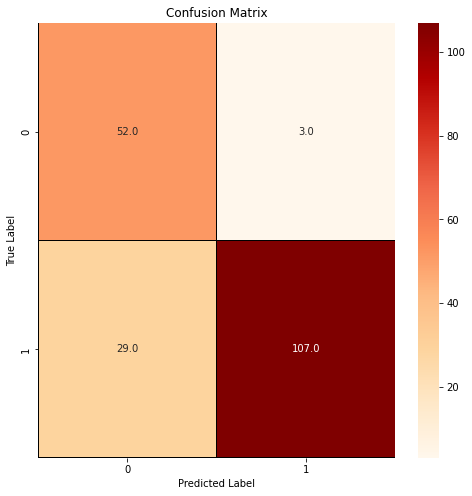

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = model.predict(X_predict)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 


confusion_mtx = confusion_matrix(y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="OrRd",linecolor="black", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()